In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Coursera ML DS FuelConsumptionCo2.csv")

In [3]:
# summarize the data 
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


<function matplotlib.pyplot.show(*args, **kw)>

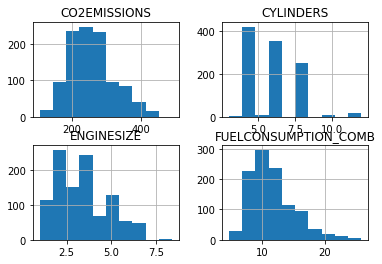

In [5]:
# Plotting features 
cdf.hist()
plt.show

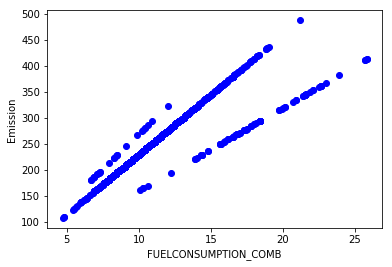

In [6]:
#Plot features vs emission to find out extent of linear relation
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

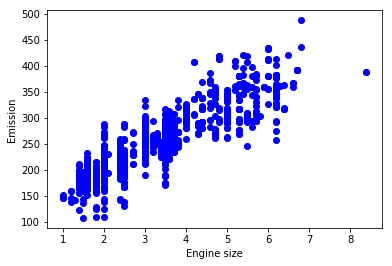

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

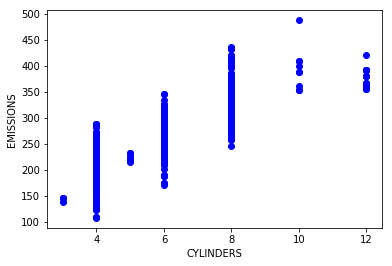

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel('EMISSIONS')
plt.show()

In [9]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

In [10]:
# Model the data using sklearn

from sklearn import linear_model
regressionmodel = linear_model.LinearRegression()

# Train using asanyarray 
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regressionmodel.fit (train_x, train_y)

# The coefficients of the regression line
print ('Coefficients: ', regressionmodel.coef_)
print ('Intercept: ',regressionmodel.intercept_)

Coefficients:  [[39.76030649]]
Intercept:  [124.01734522]


In [11]:
# This is why you need to specify position of the number later on when you plot the line
print(regressionmodel.coef_)
print(regressionmodel.intercept_)


[[39.76030649]]
[124.01734522]


Text(0, 0.5, 'Emission')

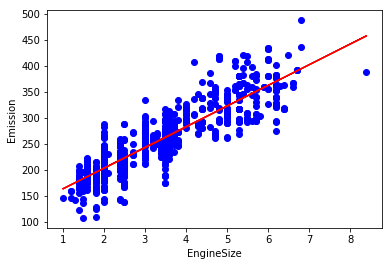

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x,  regressionmodel.coef_[0][0]*train_x + regressionmodel.intercept_[0], 'red')
plt.xlabel('EngineSize')
plt.ylabel('Emission')

Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regressionmodel.predict(test_x) #Take in test_x and try to predict test_y

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.08
Residual sum of squares (MSE): 988.22
R2-score: 0.68


# Multiple Linear Regression

In [14]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
multiR = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
multiR.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


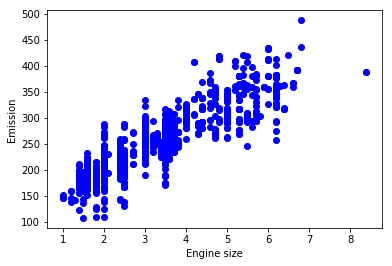

In [16]:
plt.scatter(multiR.ENGINESIZE, multiR.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [17]:
mask = np.random.rand(len(multiR)) < 0.8
print(mask)
train = multiR[mask]
test = multiR[~mask]

[ True  True  True ...  True  True  True]


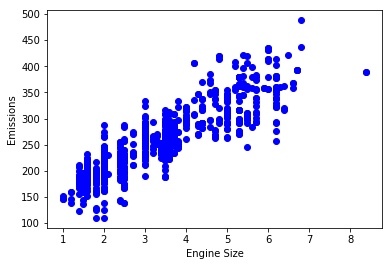

In [18]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [19]:
from sklearn import linear_model
multireg = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
multireg.fit(x,y)

# Coefficients are found by sklearn through Oridnary Least Squares
print('Coefficients: ', multireg.coef_)



Coefficients:  [[11.20580552  7.08238692  9.66047844]]


In [20]:
y_hat= multireg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % multireg.score(x, y))

Residual sum of squares: 509.19
Variance score: 0.86


In [21]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [22]:
multiR2 = df[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'ENGINESIZE', 'CYLINDERS','CO2EMISSIONS']]
multiR2.head(9)

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,9.9,6.7,2.0,4,196
1,11.2,7.7,2.4,4,221
2,6.0,5.8,1.5,4,136
3,12.7,9.1,3.5,6,255
4,12.1,8.7,3.5,6,244
5,11.9,7.7,3.5,6,230
6,11.8,8.1,3.5,6,232
7,12.8,9.0,3.7,6,255
8,13.4,9.5,3.7,6,267


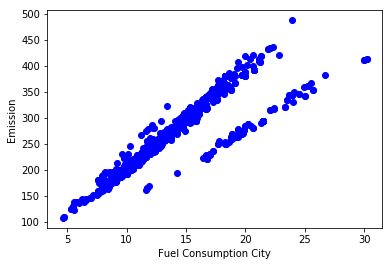

In [23]:
plt.scatter(multiR2.FUELCONSUMPTION_CITY, multiR2.CO2EMISSIONS, color='blue')
plt.xlabel("Fuel Consumption City")
plt.ylabel("Emission")
plt.show()

In [24]:
mask = np.random.rand(len(multiR2)) < 0.8
train2 = multiR2[mask]
test2 = multiR2[~mask]

In [25]:
from sklearn import linear_model
multireg2 = linear_model.LinearRegression()
x = np.asanyarray(train[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'ENGINESIZE', 'CYLINDERS']])
y = np.asanyarray(train[['CO2EMISSIONS']])
multireg2.fit(x,y)

#Coefficients
print('Coefficeints: ', multireg2.coef_)

Coefficeints:  [[ 5.23422469  4.45066898 11.20454728  7.10570587]]


In [26]:
y_hat= multireg2.predict(test[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'ENGINESIZE', 'CYLINDERS']])
x = np.asanyarray(test[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'ENGINESIZE', 'CYLINDERS']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % multireg2.score(x, y))

Residual sum of squares: 509.55
Variance score: 0.86


# Non Linear Regression


In [27]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [28]:
nonlinear = df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
nonlinear.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


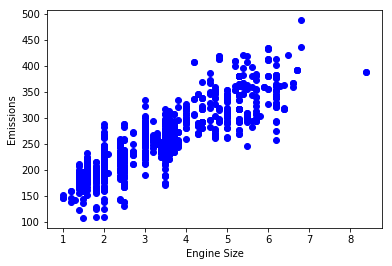

In [29]:
plt.scatter(nonlinear.ENGINESIZE, nonlinear.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()


In [30]:
mask = np.random.rand(len(nonlinear)) < 0.8
train = nonlinear[mask]
test = nonlinear[~mask]
print(train.head(3)) 

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2) # Determines degree of feature
train_x_poly = poly.fit_transform(train_x) # Produces x sq and x cube etc
train_x_poly[1]

array([1.  , 2.4 , 5.76])

In [32]:
polyR = linear_model.LinearRegression()
polyR.fit(train_x_poly, train_y)
#Coefficients
print('Coefficients: ', polyR.coef_)
print('Intercept: ', polyR.intercept_)


Coefficients:  [[ 0.         51.89050819 -1.72123813]]
Intercept:  [105.45189192]


Text(0, 0.5, 'Emission')

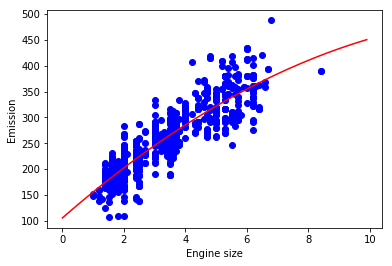

In [33]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = polyR.intercept_[0]+ polyR.coef_[0][1]*XX+ polyR.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'red' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [34]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = polyR.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.54
Residual sum of squares (MSE): 1080.13
R2-score: 0.61


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x2 = np.asanyarray(train[['ENGINESIZE']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])

poly3 = PolynomialFeatures(degree=3)
train_x2_poly = poly3.fit_transform(train_x2)

polyR3 = linear_model.LinearRegression()
polyR3.fit(train_x2_poly, train_y)

print('Coefficients for 3rd Degree: ', polyR3.coef_)
print('Intercept: ', polyR3.intercept_)

Coefficients for 3rd Degree:  [[ 0.         33.35496502  3.37913916 -0.42220897]]
Intercept:  [125.10507403]


Text(0, 0.5, 'Emission')

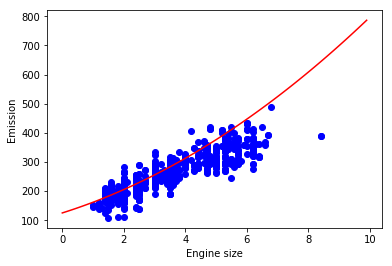

In [36]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX2 = np.arange(0.0,10.0,0.1)
yy2 = polyR3.intercept_[0]+ polyR3.coef_[0][1]*XX2+ polyR3.coef_[0][2]*np.power(XX, 2)
plt.plot(XX2, yy2, 'red' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [37]:
from sklearn.metrics import r2_score
test_x2_poly = poly3.fit_transform(test_x)
test_y2_ = polyR3.predict(test_x2_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y2_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y2_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y2_ , test_y) )

Mean absolute error: 24.51
Residual sum of squares (MSE): 1074.20
R2-score: 0.61


# Classification

In [38]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [39]:
clusterdf = pd.read_csv('Coursera ML DS Telecom.csv')
clusterdf.head(9)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3


In [40]:
clusterdf['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

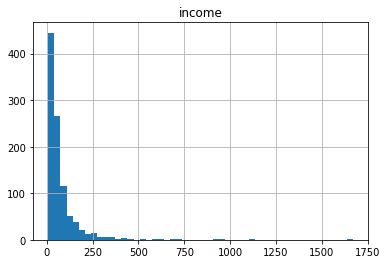

In [41]:
clusterdf.hist(column='income',bins=50)
plt.show()

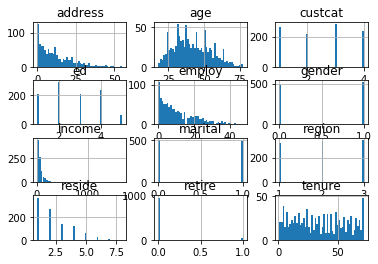

In [42]:
clusterdf.hist(bins=50)
plt.show()

In [43]:
clusterdf.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [44]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X = clusterdf[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0]

array([ 2., 13., 44.,  1.,  9., 64.,  4.,  5.,  0.,  0.,  2.])

In [45]:
# Creating an array that contains the categories
y = clusterdf['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [46]:
clusterdf.head(1)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1


In [47]:
# Need to give data zero mean and unit variance
X1 = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X1[0]


array([-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
       -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
       -0.23065004])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [49]:
mask = np.random.rand(len(X1)) <0.8
trainC = X1[mask]
testC = X1[~mask]
print(trainC.shape)
print(testC.shape)

(801, 11)
(199, 11)


In [50]:
# They have no 'u' in the spelling of neighbours
from sklearn.neighbors import KNeighborsClassifier

In [51]:
k=4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [52]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 3, 4, 4], dtype=int64)

In [53]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.55625
Test set Accuracy:  0.26


In [54]:
k2 = 6
neigh2 = KNeighborsClassifier(n_neighbors = k2).fit(X_train,y_train)
neigh2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [55]:
yhat2 = neigh2.predict(X_test)
yhat2[0:5]

array([4, 4, 1, 3, 4], dtype=int64)

In [56]:
from sklearn import metrics 
print('Training set Accuracy: ', metrics.accuracy_score(y_train,neigh2.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test,yhat2))

Training set Accuracy:  0.495
Test set Accuracy:  0.295


In [57]:
# How to choose the right K?
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ])

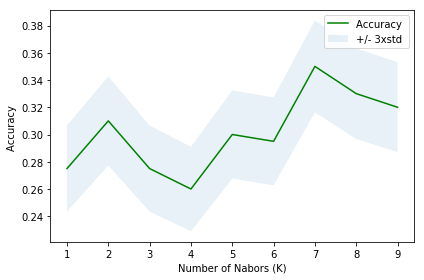

In [58]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# DECISION TREES

In [59]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [60]:
drug = pd.read_csv('Coursera ML DS Drug.csv')
drug.head(9)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY


In [61]:
drug.shape

(200, 6)

In [62]:
D = drug[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
D[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [63]:
# Decision trees cannot handle cateogrical data therefore we need to change it to numerical values
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
D[:,1] = le_sex.transform(D[:,1])

In [64]:
D[0:5]

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.113999999999999],
       [28, 0, 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 0, 'LOW', 'HIGH', 18.043]], dtype=object)

In [65]:
le_bp = preprocessing.LabelEncoder()
le_bp.fit(['NORMAL','HIGH','LOW'])
D[:,2] = le_bp.transform(D[:,2])

In [66]:
D[0:5]

array([[23, 0, 0, 'HIGH', 25.355],
       [47, 1, 1, 'HIGH', 13.093],
       [47, 1, 1, 'HIGH', 10.113999999999999],
       [28, 0, 2, 'HIGH', 7.797999999999999],
       [61, 0, 1, 'HIGH', 18.043]], dtype=object)

In [67]:
le_cholestrol = preprocessing.LabelEncoder()
le_cholestrol.fit(['HIGH','NORMAL'])
D[:,3] = le_cholestrol.transform(D[:,3])
D[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [68]:
DrugResult = drug['Drug']
DrugResult.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [70]:
# Setting up the Decision Tree
#Splitting into train and test needs 4 parameters X,Y,test_size=0.3, random_state=3
# Will output X_trainset, X_testset, y_trainset, y_testset

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(D, DrugResult, test_size=0.3, random_state=3)


In [71]:
X_trainset.shape

(140, 5)

In [73]:
y_trainset.shape


(140,)

# Decision Tree Modeling

In [75]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree #shows the default parameters


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [98]:
#Training Decision Tree
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
predTree = drugTree.predict(X_testset)
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [156]:
#Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print('Decision Tree Accuracy: ', metrics.accuracy_score(y_testset,predTree))

Decision Tree Accuracy:  0.9833333333333333


In [157]:
resultAccuracy = ['False'] * 60
Ytest = y_testset.values
print(len(resultAccuracy))
print (resultAccuracy[1])

60
False


In [158]:
for i in range(60):
    if predTree[i] == Ytest[i]:
        resultAccuracy[i] = 'True'
        print(resultAccuracy)
    else:
        resultAccuracy[i] = 'False'      


['True', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False']
['True', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'F

In [159]:
print(len(resultAccuracy))
i = 0
for n in range(60):
    if resultAccuracy[n] == 'True':
        i += 1
print(i)
print(i/60*100)

60
59
98.33333333333333


# Support Vector Machines (SVM)

In [214]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [215]:
cell_df = pd.read_csv('Coursera ML DS Cells.csv')
cell_df.head()

# Benign (class = 2), Malignant (class = 4)\


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


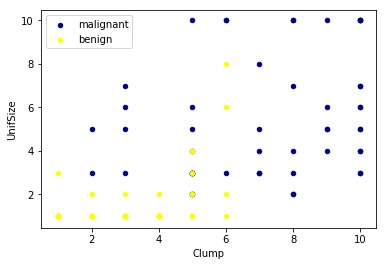

In [216]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()
# ax=ax plots two tables ontop of each other


In [217]:
cell_df.dtypes #look at data column types

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [218]:
# Need to change BareNuc col as it does not contain numerical values
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
# pd.to_numeric changes the values to numeric while .notnull() ensures that only the non-empty cells are converted.
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

# NAN values are still in the BareNuc col but their  type is int32

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [219]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [:]
y.shape

(683,)

In [227]:
x_train,y_train,x_test,y_test= train_test_split(cell_df,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (800, 11) (137, 11)
Test set: (200, 11) (137,)


In [228]:
y_train2 = y_train['Class']
y_train2.shape

(137,)

In [230]:
from sklearn import svm # importing support vector model
supVecM = svm.SVC(kernel='rbf') #using the radial basis function
supVecM.fit(X_train,y_train)

ValueError: bad input shape (137, 11)

In [ ]:
yhat = supVecM.predict(X_test)
yhat[0:5]